<a href="https://colab.research.google.com/github/gnitnaw/LDL/blob/main/tf_framework/c5e2_mnist_learning_conf5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
The MIT License (MIT)
Copyright (c) 2021 NVIDIA
Permission is hereby granted, free of charge, to any person obtaining a copy of
this software and associated documentation files (the "Software"), to deal in
the Software without restriction, including without limitation the rights to
use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of
the Software, and to permit persons to whom the Software is furnished to do so,
subject to the following conditions:
The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS
FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR
COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER
IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN
CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
"""


'\nThe MIT License (MIT)\nCopyright (c) 2021 NVIDIA\nPermission is hereby granted, free of charge, to any person obtaining a copy of\nthis software and associated documentation files (the "Software"), to deal in\nthe Software without restriction, including without limitation the rights to\nuse, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of\nthe Software, and to permit persons to whom the Software is furnished to do so,\nsubject to the following conditions:\nThe above copyright notice and this permission notice shall be included in all\ncopies or substantial portions of the Software.\nTHE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR\nIMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS\nFOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR\nCOPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER\nIN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OU

This code example is very similar to c5e1_mnist_learning but the network is modified to use ReLU neruons in the hidden layer, softmax in the output layer, categorical crossentropy as loss function, Adam as optimizer, and a mini-batch size of 64. More context for this code example can be found in the section "Experiment: Tweaking Network and Learning Parameters" in Chapter 5 in the book Learning Deep Learning by Magnus Ekman (ISBN: 9780137470358).

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
import logging
import matplotlib.pyplot as plt
tf.get_logger().setLevel(logging.ERROR)

EPOCHS = 20
BATCH_SIZE = 64
BATCH_SIZE1 = 1
BATCH_SIZE2 = 1
BATCH_SIZE3 = 1
BATCH_SIZE4 = 1
BATCH_SIZE5 = 64

# Load training and test datasets.
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images,
                               test_labels) = mnist.load_data()

# Standardize the data.
mean = np.mean(train_images)
stddev = np.std(train_images)
train_images = (train_images - mean) / stddev
test_images = (test_images - mean) / stddev

# One-hot encode labels.
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

opt1 = keras.optimizers.SGD(learning_rate=0.01)
opt2 = keras.optimizers.SGD(learning_rate=10)
initializer = keras.initializers.RandomUniform(
    minval=-0.1, maxval=0.1)

print("================================ Conf. 1 ================================ ")

model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(25, activation='tanh',
                       kernel_initializer=initializer,
                       bias_initializer='zeros'),
    keras.layers.Dense(10, activation='sigmoid',
                       kernel_initializer=initializer,
                       bias_initializer='zeros')])

model1.compile(loss='mean_squared_error', 
               optimizer = opt1, 
               metrics =['accuracy'])

history1 = model1.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    epochs=EPOCHS, batch_size=BATCH_SIZE1,
                    verbose=2, shuffle=True)

print("================================ Conf. 2 ================================ ")

model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(25, activation='tanh',
                       kernel_initializer=initializer,
                       bias_initializer='zeros'),
    keras.layers.Dense(10, activation='sigmoid',
                       kernel_initializer=initializer,
                       bias_initializer='zeros')])

model2.compile(loss='mean_squared_error',
              optimizer = opt2,
              metrics =['accuracy'])

history2 = model2.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    epochs=EPOCHS, batch_size=BATCH_SIZE2,
                    verbose=2, shuffle=True)

print("================================ Conf. 3 ================================ ")

model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(25, activation='tanh',
                       kernel_initializer='glorot_uniform',
                       bias_initializer='zeros'),
    keras.layers.Dense(10, activation='sigmoid',
                       kernel_initializer='glorot_uniform',
                       bias_initializer='zeros')])

model3.compile(loss='mean_squared_error',
              optimizer = 'adam',
              metrics =['accuracy'])

history3 = model3.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    epochs=EPOCHS, batch_size=BATCH_SIZE3,
                    verbose=2, shuffle=True)

print("================================ Conf. 4 ================================ ")

model4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(25, activation='relu',
                       kernel_initializer='he_normal',
                       bias_initializer='zeros'),
    keras.layers.Dense(10, activation='softmax',
                       kernel_initializer='glorot_uniform',
                       bias_initializer='zeros')])

model4.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics =['accuracy'])

history4 = model4.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    epochs=EPOCHS, batch_size=BATCH_SIZE4,
                    verbose=2, shuffle=True)

print("================================ Conf. 5 ================================ ")

model5 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(25, activation='relu',
                       kernel_initializer='he_normal',
                       bias_initializer='zeros'),
    keras.layers.Dense(10, activation='softmax',
                       kernel_initializer='glorot_uniform',
                       bias_initializer='zeros')])

model5.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics =['accuracy'])

history5 = model5.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    epochs=EPOCHS, batch_size=BATCH_SIZE5,
                    verbose=2, shuffle=True)


================================ Conf. 1 ================================ 
Epoch 1/20
60000/60000 - 80s - loss: 0.0492 - accuracy: 0.7209 - val_loss: 0.0243 - val_accuracy: 0.8931 - 80s/epoch - 1ms/step
Epoch 2/20
60000/60000 - 74s - loss: 0.0199 - accuracy: 0.9012 - val_loss: 0.0164 - val_accuracy: 0.9158 - 74s/epoch - 1ms/step
Epoch 3/20
60000/60000 - 75s - loss: 0.0157 - accuracy: 0.9160 - val_loss: 0.0143 - val_accuracy: 0.9220 - 75s/epoch - 1ms/step
Epoch 4/20
60000/60000 - 75s - loss: 0.0140 - accuracy: 0.9224 - val_loss: 0.0132 - val_accuracy: 0.9266 - 75s/epoch - 1ms/step
Epoch 5/20
60000/60000 - 73s - loss: 0.0129 - accuracy: 0.9283 - val_loss: 0.0125 - val_accuracy: 0.9291 - 73s/epoch - 1ms/step
Epoch 6/20
60000/60000 - 75s - loss: 0.0122 - accuracy: 0.9316 - val_loss: 0.0120 - val_accuracy: 0.9326 - 75s/epoch - 1ms/step
Epoch 7/20
60000/60000 - 75s - loss: 0.0116 - accuracy: 0.9342 - val_loss: 0.0116 - val_accuracy: 0.9342 - 75s/epoch - 1ms/step
Epoch 8/20
60000/60000 - 73s 

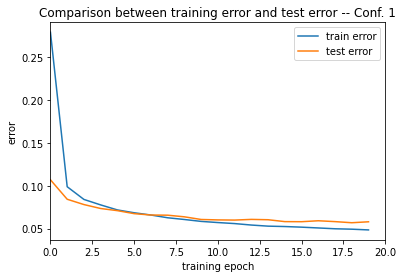

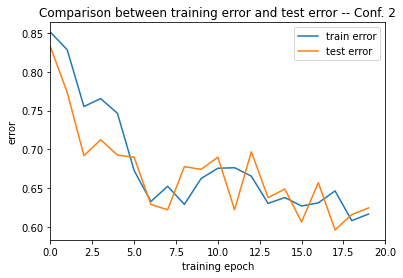

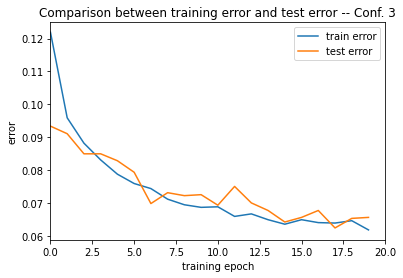

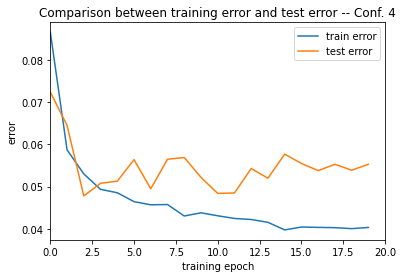

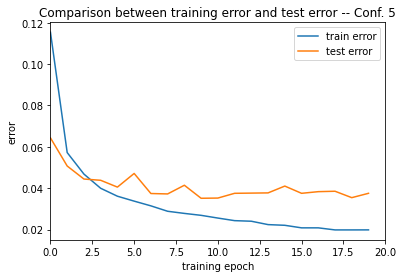

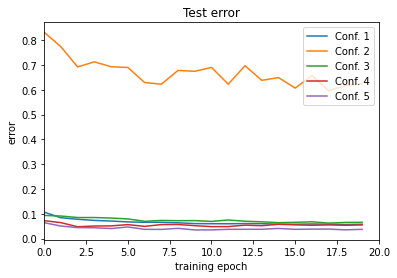

In [3]:
# summarize history for accuracy

plt.plot(1.0 - np.array(history1.history['accuracy']))
plt.plot(1.0 - np.array(history1.history['val_accuracy']))
plt.title('Comparison between training error and test error -- Conf. 1')
plt.ylabel('error')
plt.xlabel('training epoch')
plt.xlim(0,20)
plt.legend(['train error', 'test error'], loc='upper right')
plt.show()

plt.plot(1.0 - np.array(history2.history['accuracy']))
plt.plot(1.0 - np.array(history2.history['val_accuracy']))
plt.title('Comparison between training error and test error -- Conf. 2')
plt.ylabel('error')
plt.xlabel('training epoch')
plt.xlim(0,20)
plt.legend(['train error', 'test error'], loc='upper right')
plt.show()

plt.plot(1.0 - np.array(history3.history['accuracy']))
plt.plot(1.0 - np.array(history3.history['val_accuracy']))
plt.title('Comparison between training error and test error -- Conf. 3')
plt.ylabel('error')
plt.xlabel('training epoch')
plt.xlim(0,20)
plt.legend(['train error', 'test error'], loc='upper right')
plt.show()

plt.plot(1.0 - np.array(history4.history['accuracy']))
plt.plot(1.0 - np.array(history4.history['val_accuracy']))
plt.title('Comparison between training error and test error -- Conf. 4')
plt.ylabel('error')
plt.xlabel('training epoch')
plt.xlim(0,20)
plt.legend(['train error', 'test error'], loc='upper right')
plt.show()

plt.plot(1.0 - np.array(history5.history['accuracy']))
plt.plot(1.0 - np.array(history5.history['val_accuracy']))
plt.title('Comparison between training error and test error -- Conf. 5')
plt.ylabel('error')
plt.xlabel('training epoch')
plt.xlim(0,20)
plt.legend(['train error', 'test error'], loc='upper right')
plt.show()

plt.plot(1.0 - np.array(history1.history['val_accuracy']))
plt.plot(1.0 - np.array(history2.history['val_accuracy']))
plt.plot(1.0 - np.array(history3.history['val_accuracy']))
plt.plot(1.0 - np.array(history4.history['val_accuracy']))
plt.plot(1.0 - np.array(history5.history['val_accuracy']))
plt.title('Test error')
plt.ylabel('error')
plt.xlabel('training epoch')
plt.xlim(0,20)
plt.legend(['Conf. 1', 'Conf. 2', 'Conf. 3', 'Conf. 4', 'Conf. 5'], loc='upper right')
plt.show()